In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

 # import data
boston_df = pd.read_csv('housing2.csv', sep = ',')


In [2]:
boston_df.shape

(506, 27)

In [3]:
boston_df.dtypes

ATT1       float64
ATT2       float64
ATT3       float64
ATT4       float64
ATT5       float64
ATT6       float64
ATT7       float64
ATT8       float64
ATT9       float64
ATT10      float64
ATT11      float64
ATT12      float64
ATT13      float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ATT1     506 non-null    float64
 1   ATT2     506 non-null    float64
 2   ATT3     506 non-null    float64
 3   ATT4     506 non-null    float64
 4   ATT5     506 non-null    float64
 5   ATT6     506 non-null    float64
 6   ATT7     506 non-null    float64
 7   ATT8     506 non-null    float64
 8   ATT9     506 non-null    float64
 9   ATT10    506 non-null    float64
 10  ATT11    506 non-null    float64
 11  ATT12    506 non-null    float64
 12  ATT13    506 non-null    float64
 13  CRIM     506 non-null    float64
 14  ZN       506 non-null    float64
 15  INDUS    506 non-null    float64
 16  CHAS     506 non-null    int64  
 17  NOX      506 non-null    float64
 18  RM       506 non-null    float64
 19  AGE      506 non-null    float64
 20  DIS      506 non-null    float64
 21  RAD      506 non

In [5]:
boston_df.dtypes

ATT1       float64
ATT2       float64
ATT3       float64
ATT4       float64
ATT5       float64
ATT6       float64
ATT7       float64
ATT8       float64
ATT9       float64
ATT10      float64
ATT11      float64
ATT12      float64
ATT13      float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
boston_df.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
boston_df.describe()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.518457,0.500422,0.507451,0.498543,0.525487,0.508831,0.501997,0.509998,0.480159,0.501922,...,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,0.283847,0.298752,0.289607,0.294229,0.283387,0.282400,0.287986,0.290160,0.301086,0.294051,...,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000727,0.000321,0.000013,0.001541,0.003970,0.000679,0.003653,0.000525,0.001093,0.000263,...,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.272918,0.235879,0.244897,0.229861,0.283208,0.276366,0.271701,0.257320,0.208171,0.248119,...,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.521326,0.485701,0.526013,0.506543,0.514982,0.509443,0.499804,0.508327,0.465557,0.487129,...,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,0.770235,0.774921,0.750546,0.757517,0.772218,0.730899,0.756420,0.768465,0.739580,0.771559,...,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,0.995798,0.999265,0.998746,0.995561,0.998635,0.998194,0.999140,0.997083,0.996714,0.999321,...,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exploratory Data Analysis (EDA)

## Q-Q Plot

506


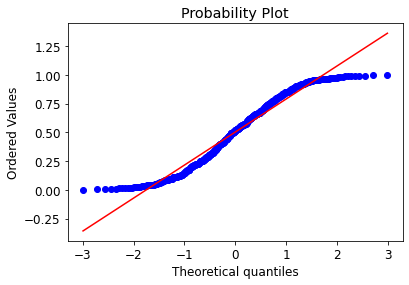

In [8]:
import scipy.stats as stats
import pylab

arr = boston_df.to_numpy()
print(len(arr))
l= len(arr)
k=[]
for i in range(l):
    kk=arr[i][10] 
    k.append(kk)
#print(k)
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
k=np.array(k)
stats.probplot(k, dist="norm", plot=pylab)
pylab.show()

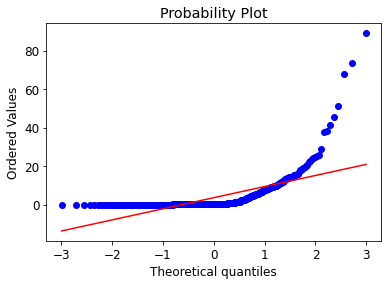

In [9]:
k=[]
for i in range(l):
    kk=arr[i][13] 
    k.append(kk)
#print(k)
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
k=np.array(k)
stats.probplot(k, dist="norm", plot=pylab)
pylab.show()

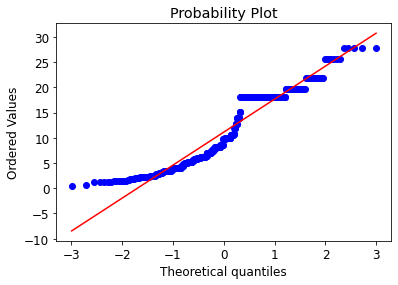

In [10]:
k=[]
for i in range(l):
    kk=arr[i][15] 
    k.append(kk)
#print(k)
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
k=np.array(k)
stats.probplot(k, dist="norm", plot=pylab)
pylab.show()

In [11]:
summary=boston_df.describe()
print(summary)

             ATT1        ATT2        ATT3        ATT4        ATT5        ATT6  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.518457    0.500422    0.507451    0.498543    0.525487    0.508831   
std      0.283847    0.298752    0.289607    0.294229    0.283387    0.282400   
min      0.000727    0.000321    0.000013    0.001541    0.003970    0.000679   
25%      0.272918    0.235879    0.244897    0.229861    0.283208    0.276366   
50%      0.521326    0.485701    0.526013    0.506543    0.514982    0.509443   
75%      0.770235    0.774921    0.750546    0.757517    0.772218    0.730899   
max      0.995798    0.999265    0.998746    0.995561    0.998635    0.998194   

             ATT7        ATT8        ATT9       ATT10  ...         NOX  \
count  506.000000  506.000000  506.000000  506.000000  ...  506.000000   
mean     0.501997    0.509998    0.480159    0.501922  ...    0.554695   
std      0.287986    0.290160    0.301086    0.2

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = boston_df.corr(method='pearson')
print(corr)

             ATT1      ATT2      ATT3      ATT4      ATT5      ATT6      ATT7  \
ATT1     1.000000 -0.016224 -0.032684  0.021671  0.000080 -0.019256 -0.001771   
ATT2    -0.016224  1.000000  0.063504  0.091987 -0.019261 -0.023855 -0.053218   
ATT3    -0.032684  0.063504  1.000000 -0.022675 -0.074077 -0.006395  0.052059   
ATT4     0.021671  0.091987 -0.022675  1.000000  0.025368 -0.037611 -0.047746   
ATT5     0.000080 -0.019261 -0.074077  0.025368  1.000000 -0.018276  0.019902   
ATT6    -0.019256 -0.023855 -0.006395 -0.037611 -0.018276  1.000000  0.004695   
ATT7    -0.001771 -0.053218  0.052059 -0.047746  0.019902  0.004695  1.000000   
ATT8    -0.029952 -0.087045 -0.015523  0.001071  0.025115 -0.025959 -0.054046   
ATT9     0.013154 -0.069001 -0.000051 -0.063787 -0.009464 -0.006702 -0.004099   
ATT10   -0.070779 -0.016541 -0.014926  0.010070  0.005722 -0.028424  0.010263   
ATT11    0.006650 -0.008150 -0.132637 -0.023686 -0.025853 -0.002135  0.020908   
ATT12   -0.085219 -0.010033 

## HeatMap

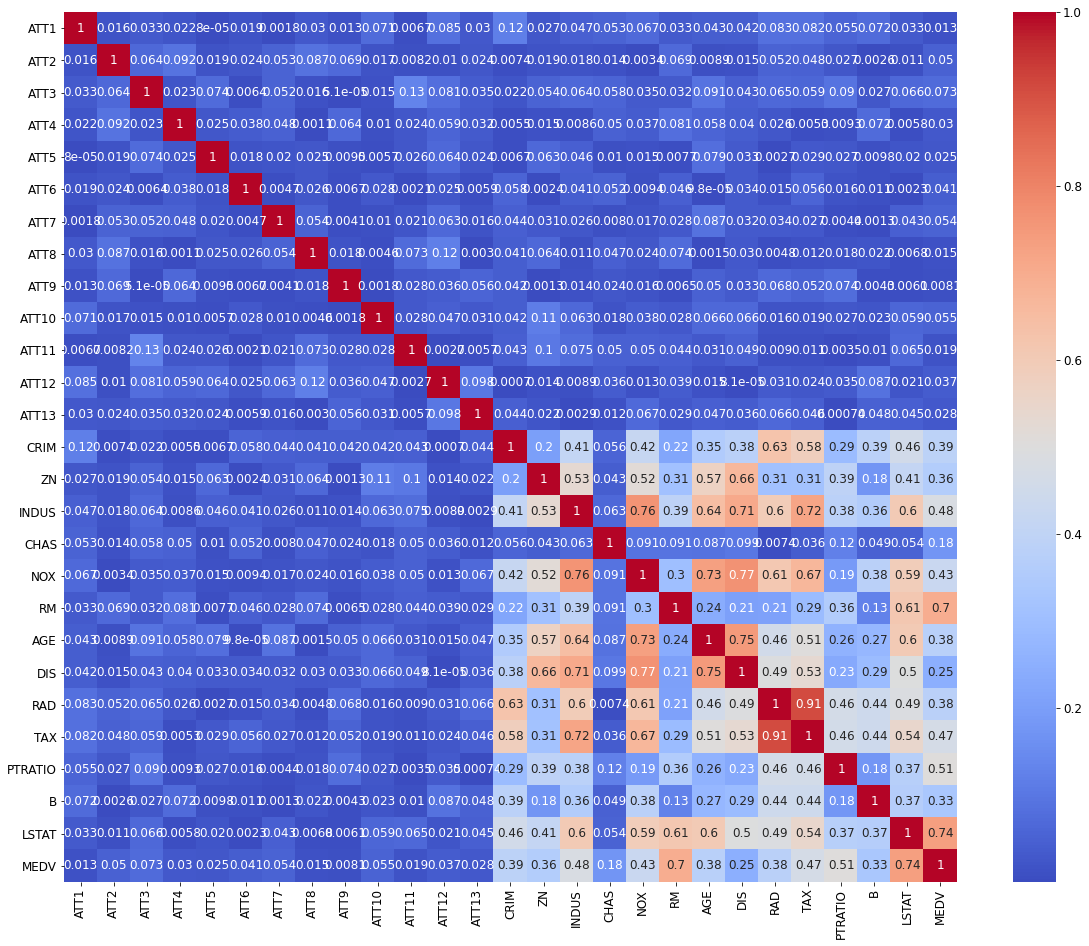

In [13]:
# Plot the absolute value of the corr heatmap
corr_matrix = boston_df.corr().abs()
plt.figure(figsize = (20,16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()


# Identify X and y

In [14]:
X = boston_df.iloc[:, 0:-1].values
y = boston_df.iloc[:, -1].values
# Train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=42)

# Linear Regression Model

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr_train_score=lr.score(X_train, y_train)
lr_test_score=lr.score(X_test, y_test)
print ("linear regression train score:", lr_train_score)
print ("linear regression test score:", lr_test_score)

linear regression train score: 0.762725461446246
linear regression test score: 0.6368627208821074


### Model Coefficients 

In [17]:
lr_coef=lr.coef_
print ("linear regression coefficients:", lr_coef)

linear regression coefficients: [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]


### y Intercept

In [18]:
lr_intercept=lr.intercept_
print ("linear regression y intercept:", lr_intercept)

linear regression y intercept: 29.011841172930723


### Mean Squared Error (MSE)

In [19]:
# Make predictions using the testing set
lr_y_pred = lr.predict(X_test)

In [20]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lr_y_pred))

Mean squared error: 26.63


### R2

In [21]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lr_y_pred))

Coefficient of determination: 0.64


### Plot the residual errors

Text(0, 0.5, 'Residuals')

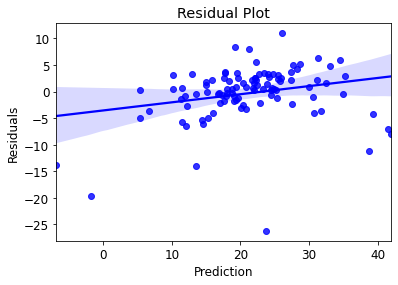

In [22]:
residual = lr_y_pred - y_test
ax = sns.regplot(x = lr_y_pred, y = residual, data = None, scatter = True, color = 'blue')
ax.set_title('Residual Plot')
ax.set_xlabel('Prediction')
ax.set_ylabel('Residuals')

# Ridge Regression (L2)

## α=0.01

In [23]:
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [24]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)

ridge regression train score low alpha: 0.7627247838362675
ridge regression test score low alpha: 0.6368433408080394


### Model Coefficients

In [25]:
rr_coef=rr.coef_
print ("ridge regression coefficients:", rr_coef)

ridge regression coefficients: [ 2.89407395e+00 -2.42930315e-01  5.57715456e-01 -1.05099713e-01
 -7.70558899e-01 -6.20145489e-01  6.67077437e-01 -2.78397397e-01
 -1.40636351e-01 -1.01650120e+00 -9.66829347e-01  4.57556008e-01
 -1.34721808e-01 -1.27844545e-01  3.24015649e-02  3.96513176e-02
  2.73927579e+00 -1.68835885e+01  4.48225158e+00 -6.54020903e-03
 -1.46843247e+00  2.56516325e-01 -1.05276661e-02 -8.90567634e-01
  1.30911898e-02 -5.01353255e-01]


### y Intercept

In [26]:
rr_intercept=rr.intercept_
print ("ridge regression with alpha 0.01 y intercept:", rr_intercept)

ridge regression with alpha 0.01 y intercept: 28.921921077575945


### Mean Squared Error (MSE)

In [27]:
# Make predictions using the testing set
rr_y_pred = rr.predict(X_test)

In [28]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, rr_y_pred))

Mean squared error: 26.63


### R2

In [29]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, rr_y_pred))

Coefficient of determination: 0.64


### Plot the residual errors

Text(0, 0.5, 'Residuals')

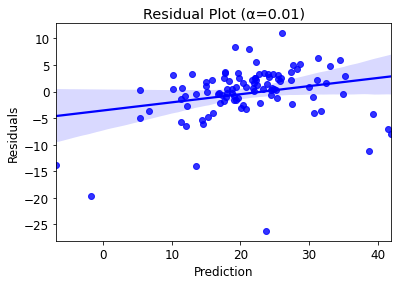

In [30]:
residual = rr_y_pred - y_test
ax = sns.regplot(x = rr_y_pred, y = residual, data = None, scatter = True, color = 'blue')
ax.set_title('Residual Plot (α=0.01)')
ax.set_xlabel('Prediction')
ax.set_ylabel('Residuals')

## α=100

In [31]:
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [32]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

ridge regression train score high alpha: 0.7285241100842467
ridge regression test score high alpha: 0.6749160150460658


### Model Coefficients

In [33]:
rr100_coef=rr100.coef_
print ("ridge regression coefficients:", rr100_coef)

ridge regression coefficients: [ 6.36480286e-01 -2.49140846e-01  1.53783485e-01 -8.91700810e-02
 -2.60140705e-01 -2.22573683e-01  2.09099912e-01  2.88655027e-02
 -4.11853525e-03 -2.30076356e-01 -3.21782548e-01  1.16512548e-01
 -8.65159208e-02 -1.13183243e-01  4.07934408e-02 -4.97866137e-02
  5.45724305e-01 -1.94833172e-01  2.43235417e+00  8.12244721e-04
 -1.13698143e+00  2.97169836e-01 -1.46209727e-02 -8.09675353e-01
  1.20720344e-02 -6.88801208e-01]


### y Intercept

In [34]:
rr100_intercept=rr100.intercept_
print ("ridge regression with alpha 100 y intercept:", rr100_intercept)

ridge regression with alpha 100 y intercept: 34.649826777446464


### Mean Squared Error (MSE)

In [35]:
# Make predictions using the testing set
rr100_y_pred = rr100.predict(X_test)

In [36]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, rr100_y_pred))

Mean squared error: 23.84


### R2

In [37]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, rr100_y_pred))

Coefficient of determination: 0.67


### Plot the residual errors

Text(0, 0.5, 'Residuals')

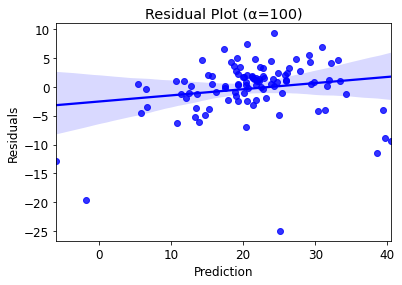

In [38]:
residual = rr100_y_pred - y_test
ax = sns.regplot(x = rr100_y_pred, y = residual, data = None, scatter = True, color = 'blue')
ax.set_title('Residual Plot (α=100)')
ax.set_xlabel('Prediction')
ax.set_ylabel('Residuals')

## α=0.1

In [39]:
rr01 = Ridge(alpha=0.1) 
rr01.fit(X_train, y_train)

Ridge(alpha=0.1)

In [40]:
Ridge_train_score01 = rr01.score(X_train,y_train)
Ridge_test_score01 = rr01.score(X_test, y_test)
print ("ridge regression train score optimized alpha:", Ridge_train_score01)
print ("ridge regression test score optimized alpha:", Ridge_test_score01)

ridge regression train score optimized alpha: 0.7626666843555105
ridge regression test score optimized alpha: 0.6366303783033147


### Model Coefficients

In [41]:
rr01_coef=rr01.coef_
print ("ridge regression coefficients:", rr01_coef)

ridge regression coefficients: [ 2.88102433e+00 -2.64844380e-01  5.44526750e-01 -1.02903995e-01
 -7.92138103e-01 -6.25099143e-01  6.69322048e-01 -2.70237882e-01
 -1.35944155e-01 -1.00762310e+00 -9.71536144e-01  4.54526414e-01
 -1.50937706e-01 -1.27005165e-01  3.27536567e-02  3.45425757e-02
  2.70828309e+00 -1.57200685e+01  4.48657220e+00 -7.46572094e-03
 -1.45212968e+00  2.54231693e-01 -1.06486381e-02 -8.77099347e-01
  1.31259305e-02 -5.03657959e-01]


### y Intercept

In [42]:
rr01_intercept=rr01.intercept_
print ("ridge regression with alpha 0.1 y intercept:", rr01_intercept)

ridge regression with alpha 0.1 y intercept: 28.17716215196872


### Mean Squared Error (MSE)

In [43]:
# Make predictions using the testing set
rr01_y_pred = rr01.predict(X_test)

In [44]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, rr01_y_pred))

Mean squared error: 26.65


### R2

In [45]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, rr01_y_pred))

Coefficient of determination: 0.64


### Plot the residual errors

Text(0, 0.5, 'Residuals')

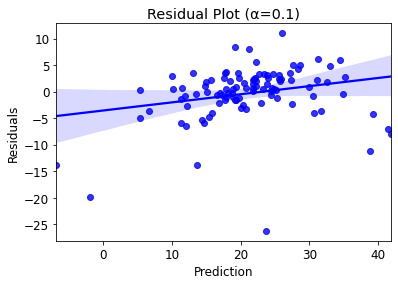

In [46]:
residual = rr01_y_pred - y_test
ax = sns.regplot(x = rr01_y_pred, y = residual, data = None, scatter = True, color = 'blue')
ax.set_title('Residual Plot (α=0.1)')
ax.set_xlabel('Prediction')
ax.set_ylabel('Residuals')

## α=200

In [47]:
rr200 = Ridge(alpha=200) 
rr200.fit(X_train, y_train)

Ridge(alpha=200)

In [48]:
Ridge_train_score200 = rr200.score(X_train,y_train)
Ridge_test_score200 = rr200.score(X_test, y_test)
print ("ridge regression train score with alpha 200:", Ridge_train_score200)
print ("ridge regression test score with alpha 200:", Ridge_test_score200)

ridge regression train score with alpha 200: 0.7124246738089026
ridge regression test score with alpha 200: 0.6784676617378855


### Model Coefficients

In [49]:
rr_200coef=rr200.coef_
print ("ridge regression coefficients:", rr_200coef)

ridge regression coefficients: [ 3.53198312e-01 -1.68486169e-01  9.89642056e-02 -6.53058393e-02
 -1.49436882e-01 -1.32184791e-01  1.25904377e-01  2.94401785e-02
  1.37695461e-03 -1.23280411e-01 -1.88844827e-01  7.44225419e-02
 -4.34623525e-02 -1.11468714e-01  4.03000792e-02 -5.32786156e-02
  3.24196607e-01 -9.08285294e-02  1.68520651e+00  1.01675834e-02
 -1.01478437e+00  3.10957963e-01 -1.50260348e-02 -8.15027208e-01
  1.15213417e-02 -7.39039538e-01]


### y Intercept

In [50]:
rr_i200ntercept=rr200.intercept_
print ("ridge regression with alpha 200 y intercept:", rr_i200ntercept)

ridge regression with alpha 200 y intercept: 39.15075495406488


### Mean Squared Error (MSE)

In [51]:
# Make predictions using the testing set
rr200_y_pred = rr200.predict(X_test)

In [52]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, rr200_y_pred))

Mean squared error: 23.58


### R2

In [53]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, rr200_y_pred))

Coefficient of determination: 0.68


### Plot the residual errors

Text(0, 0.5, 'Residuals')

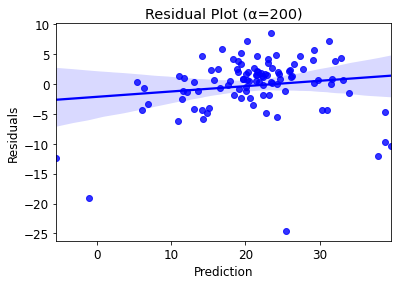

In [54]:
residual = rr200_y_pred - y_test
ax = sns.regplot(x = rr200_y_pred, y = residual, data = None, scatter = True, color = 'blue')
ax.set_title('Residual Plot (α=200)')
ax.set_xlabel('Prediction')
ax.set_ylabel('Residuals')

## Optimize α value

In [55]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 7, 10, 30,100, 200])
ridgecv.fit(X_train, y_train)
ridgecv.alpha_  # 0.1 

0.1

# Lasso Regression (L1)

## α=0.001

In [56]:
lasso0001 = Lasso(alpha=0.001, max_iter=10e5)
lasso0001.fit(X_train,y_train)

Lasso(alpha=0.001, max_iter=1000000.0)

In [57]:
train_score0001=lasso0001.score(X_train,y_train)
test_score0001=lasso0001.score(X_test,y_test)

coeff_used0001 = np.sum(lasso0001.coef_!=0)
print ("training score for alpha=0.001:", train_score0001 )
print( "test score for alpha =0.001: ", test_score0001)
print ("number of features used: for alpha =0.001:", coeff_used0001)

training score for alpha=0.001: 0.762719628633817
test score for alpha =0.001:  0.6368154987694612
number of features used: for alpha =0.001: 26


### Model Coefficients

In [58]:
lasso0001_coef=lasso0001.coef_
print ("ridge regression coefficients:", lasso0001_coef)

ridge regression coefficients: [ 2.88195208e+00 -2.34487241e-01  5.47576109e-01 -9.39235031e-02
 -7.62939165e-01 -6.07369837e-01  6.56448189e-01 -2.62489484e-01
 -1.27182643e-01 -1.00575485e+00 -9.58656118e-01  4.43594899e-01
 -1.28866916e-01 -1.27735178e-01  3.24154123e-02  3.88935209e-02
  2.72081710e+00 -1.66871996e+01  4.48168994e+00 -6.66341332e-03
 -1.46512683e+00  2.56294215e-01 -1.05487274e-02 -8.88643493e-01
  1.30898757e-02 -5.02044699e-01]


### y Intercept

In [59]:
lasso0001_intercept=lasso0001.intercept_
print ("ridge regression with alpha 0.1 y intercept:", lasso0001_intercept)

ridge regression with alpha 0.1 y intercept: 28.782280203029625


### Mean Squared Error (MSE)

In [60]:
# Make predictions using the testing set
lasso0001_y_pred = lasso0001.predict(X_test)

In [61]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lasso0001_y_pred))

Mean squared error: 26.63


### R2

In [62]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lasso0001_y_pred))

Coefficient of determination: 0.64


### Plot the residual errors

Text(0, 0.5, 'Residuals')

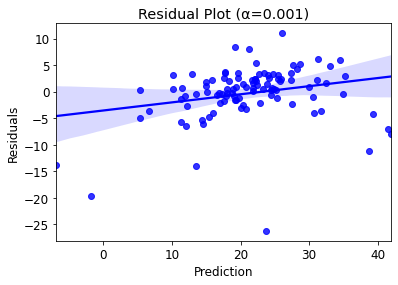

In [63]:
residual = lasso0001_y_pred - y_test
ax = sns.regplot(x = lasso0001_y_pred, y = residual, data = None, scatter = True, color = 'blue')
ax.set_title('Residual Plot (α=0.001)')
ax.set_xlabel('Prediction')
ax.set_ylabel('Residuals')

## α=0.01

In [64]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=1000000.0)

In [65]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)

coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.7621441064904143
test score for alpha =0.01:  0.6358001877006163
number of features used: for alpha =0.01: 25


### Model Coefficients

In [66]:
lasso001_coef=lasso0001.coef_
print ("ridge regression coefficients:", lasso001_coef)

ridge regression coefficients: [ 2.88195208e+00 -2.34487241e-01  5.47576109e-01 -9.39235031e-02
 -7.62939165e-01 -6.07369837e-01  6.56448189e-01 -2.62489484e-01
 -1.27182643e-01 -1.00575485e+00 -9.58656118e-01  4.43594899e-01
 -1.28866916e-01 -1.27735178e-01  3.24154123e-02  3.88935209e-02
  2.72081710e+00 -1.66871996e+01  4.48168994e+00 -6.66341332e-03
 -1.46512683e+00  2.56294215e-01 -1.05487274e-02 -8.88643493e-01
  1.30898757e-02 -5.02044699e-01]


### y Intercept

In [67]:
lasso001_intercept=lasso001.intercept_
print ("ridge regression with alpha 0.1 y intercept:", lasso001_intercept)

ridge regression with alpha 0.1 y intercept: 26.72440070533655


### Mean Squared Error (MSE)

In [68]:
# Make predictions using the testing set
lasso001_y_pred = lasso001.predict(X_test)

In [69]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lasso001_y_pred))

Mean squared error: 26.71


### R2

In [70]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lasso001_y_pred))

Coefficient of determination: 0.64


### Plot the residual errors

Text(0, 0.5, 'Residuals')

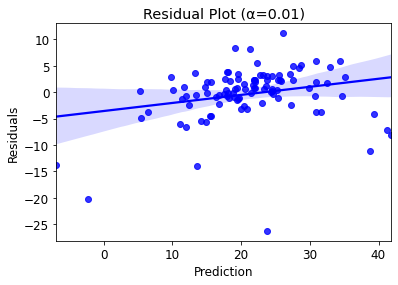

In [71]:
residual = lasso001_y_pred - y_test
ax = sns.regplot(x = lasso001_y_pred, y = residual, data = None, scatter = True, color = 'blue')
ax.set_title('Residual Plot (α=0.01)')
ax.set_xlabel('Prediction')
ax.set_ylabel('Residuals')

## α=0.5

In [72]:
lasso05 = Lasso(alpha=0.5)
lasso05.fit(X_train,y_train)

Lasso(alpha=0.5)

In [73]:
train_score05=lasso05.score(X_train,y_train)
test_score05=lasso05.score(X_test,y_test)

In [74]:
coeff_used05 = np.sum(lasso05.coef_!=0)
print ("training score for alpha=0.5:", train_score05 )
print( "test score for alpha =0.5: ", test_score05)
print ("number of features used: for alpha =0.5:", coeff_used05)

training score for alpha=0.5: 0.7258594971467812
test score for alpha =0.5:  0.6684231224146654
number of features used: for alpha =0.5: 9


### Model Coefficients

In [75]:
lasso05_coef=lasso05.coef_
print ("ridge regression coefficients:", lasso05_coef)

ridge regression coefficients: [ 0.         -0.          0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.09303407  0.03263992 -0.          0.         -0.
  3.12988585  0.         -0.91525478  0.23659632 -0.01303179 -0.72922874
  0.01234997 -0.64998372]


### y Intercept

In [76]:
lasso05_intercept=lasso05.intercept_
print ("ridge regression with alpha 0.1 y intercept:", lasso05_intercept)

ridge regression with alpha 0.1 y intercept: 26.57899239378357


### Mean Squared Error (MSE)

In [77]:
# Make predictions using the testing set
lasso05_y_pred = lasso05.predict(X_test)

In [78]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lasso05_y_pred))

Mean squared error: 24.32


### R2

In [79]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lasso05_y_pred))

Coefficient of determination: 0.67


### Plot the residual errors

Text(0, 0.5, 'Residuals')

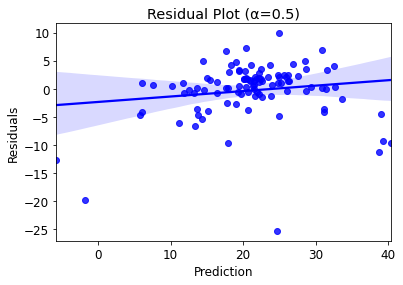

In [80]:
residual = lasso05_y_pred - y_test
ax = sns.regplot(x = lasso05_y_pred, y = residual, data = None, scatter = True, color = 'blue')
ax.set_title('Residual Plot (α=0.5)')
ax.set_xlabel('Prediction')
ax.set_ylabel('Residuals')

## α=1

In [81]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [82]:
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

In [83]:
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.6959153721670908
test score:  0.6671453631686304
number of features used:  10


### Model Coefficients

In [84]:
lasso_coef=lasso05.coef_
print ("ridge regression coefficients:", lasso_coef)

ridge regression coefficients: [ 0.         -0.          0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.09303407  0.03263992 -0.          0.         -0.
  3.12988585  0.         -0.91525478  0.23659632 -0.01303179 -0.72922874
  0.01234997 -0.64998372]


### y Intercept

In [85]:
lasso_intercept=lasso05.intercept_
print ("ridge regression with alpha 0.1 y intercept:", lasso_intercept)

ridge regression with alpha 0.1 y intercept: 26.57899239378357


### Mean Squared Error (MSE)

In [86]:
# Make predictions using the testing set
lasso_y_pred = lasso.predict(X_test)

In [87]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lasso_y_pred))

Mean squared error: 24.41


### R2

In [88]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lasso_y_pred))

Coefficient of determination: 0.67


### Plot the residual errors

Text(0, 0.5, 'Residuals')

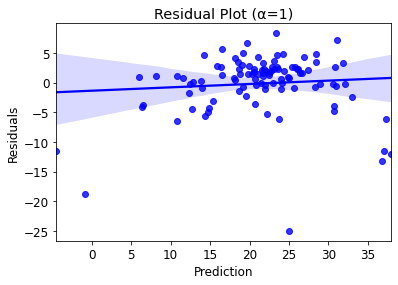

In [89]:
residual = lasso_y_pred - y_test
ax = sns.regplot(x = lasso_y_pred, y = residual, data = None, scatter = True, color = 'blue')
ax.set_title('Residual Plot (α=1)')
ax.set_xlabel('Prediction')
ax.set_ylabel('Residuals')

## Optimize α value

In [90]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas=[0.01, 0.1, 0.5, 1, 5, 7, 10, 30,100, 200])
lassocv.fit(X_train, y_train)
lassocv.alpha_  # 0.1 

0.1

# To compare Linear, Ridge, and Lasso Regression Models

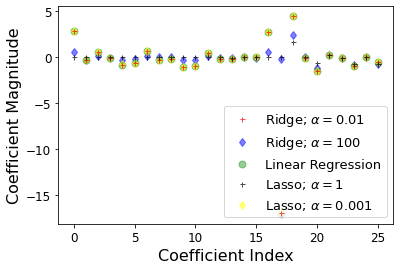

In [91]:

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='+',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='+',markersize=5,color='black',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.plot(lasso0001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='yellow',label=r'Lasso; $\alpha = 0.001$') 

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [92]:
print("My name is Hui-Erh Chai_Angela")
print("My NetID is: 674939884")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hui-Erh Chai_Angela
My NetID is: 674939884
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
